<a href="https://colab.research.google.com/github/Aishuvenkat09/Plagiarism-Detection/blob/master/Plaigirism_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
directory = "/content/drive/My Drive/Plagiarism Detection"
os.chdir(directory)

In [3]:
os.getcwd()

'/content/drive/My Drive/Plagiarism Detection'

#  **Text Cleaning**

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
import re
nltk.download('punkt')
from nltk.stem import SnowballStemmer
import string
stemmer = SnowballStemmer("english")
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
   
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def clean_text(para):

  
  #para = para.replace(',', " ")
  para = para.translate(str.maketrans('','',string.punctuation))
  words = [wordnet_lemmatizer.lemmatize(word) for word in para.split()]
  words = [(word) for word in para.split() if word.lower() not in stopwords.words("english")] 
  return " ".join(words)


In [0]:
corpuS = []
for f in os.listdir():
  if f == 'metadata':
    continue
  
  file = open('/content/drive/My Drive/Plagiarism Detection/' + f , errors= 'ignore', encoding= 'utf8')
  text = file.read()
  corpuS.append(text)
corpuS = ' '.join(corpuS)
corpuS = corpuS.replace('\n', ' ')
lines = []
lines = corpuS.split('.')
new_lines = []
for line in lines:
    ##print(line)
  line = clean_text(line.lower())
  line = line.strip()
  new_lines.append(line.split(' '))
  

In [7]:
print(new_lines[0])
print(new_lines[1])
print(new_lines[2])
print(new_lines[28])
print(new_lines[10])
print(new_lines[22])

['inheritance', 'basic', 'concept', 'objectoriented', 'programming', 'basic', 'idea', 'create', 'new', 'classes', 'add', 'extra', 'detail', 'existing', 'classes']
['done', 'allowing', 'new', 'classes', 'reuse', 'methods', 'variables', 'existing', 'classes', 'new', 'methods', 'classes', 'added', 'specialise', 'new', 'class']
['inheritance', 'models', '“iskindof”', 'relationship', 'entities', 'objects', 'example', 'postgraduates', 'undergraduates', 'kinds', 'student']
['break', 'problem', 'different', 'smaller', 'subproblems']
['pagerank', 'derived', 'theoretical', 'probability', 'value', 'logarithmic', 'scale', 'like', 'richter', 'scale']
['richard', 'bellman', 'originally', 'coined', 'term', '1940s', 'describe', 'method', 'solving', 'problems', 'one', 'needs', 'find', 'best', 'decisions', 'one', 'another', '1953', 'refined', 'method', 'current', 'modern', 'meaning']


# **GLOVE**

In [8]:
!pip install glove-python
#importing the glove library
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 

corpus.fit(new_lines, window=10)

glove = Glove(no_components=50, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4)
glove.add_dictionary(corpus.dictionary)


     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700269 sha256=66dac9d1b73f82117d6259ba43de678f3eac4c5d2f487e743f314855da8a1d15
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


# writing word vectors to text file

In [0]:
# Sort words by their id
word_and_word_id_tuples = list(glove.dictionary.items())
word_and_word_id_tuples.sort(key=lambda t: t[1])  # id is second element of tuple

# Save vectors to output file
with open(directory + '/metadata/my_glove.txt', 'w+') as f:
    #f.write(str(len(word_and_word_id_tuples)) + " " + str(args.dimension) + "\n")
    for word, word_id in word_and_word_id_tuples:
        f.write(word + " " + " ".join([str(value) for value in glove.word_vectors[word_id]]) + "\n")

In [10]:
glove.word_vectors[glove.dictionary['additional']]

array([-0.0054068 ,  0.00431128, -0.00312792,  0.00714433,  0.00262357,
       -0.0015455 , -0.00450398,  0.00417013,  0.00052631,  0.0086005 ,
       -0.00424103, -0.00569059, -0.00565302,  0.00168626,  0.00589751,
       -0.00765172,  0.0075881 , -0.00936519, -0.00621205,  0.01101614,
        0.0001968 ,  0.00779038,  0.00278538, -0.00641767,  0.0047288 ,
       -0.00431224, -0.00713579,  0.00457699,  0.00122105, -0.0050461 ,
       -0.00238065,  0.00110521,  0.0093529 , -0.00281903,  0.00738945,
       -0.00408005, -0.00098449, -0.00572154,  0.00568464,  0.00635032,
       -0.00457152,  0.00195743,  0.00397901,  0.0067556 ,  0.00917894,
        0.00484793,  0.00584431,  0.00629231, -0.00141481, -0.00563928])

In [0]:
#glove = glove.load('my_glove1.model')

In [0]:

class autovivify_list(dict):
  def __missing__(self, key):
    '''Given a missing key, set initial value to an empty list'''
    value = self[key] = []
    return value

  def __add__(self, x):
    '''Override addition for numeric types when self is empty'''
    if not self and isinstance(x, Number):
      return x
    raise ValueError

  def __sub__(self, x):
    '''Also provide subtraction method'''
    if not self and isinstance(x, Number):
      return -1 * x
    raise ValueError

In [0]:
def build_word_vector_matrix(vector_file, n_words):
  '''Return the vectors and labels for the first n_words in vector file'''
  numpy_arrays = []
  labels_array = []
  with codecs.open(vector_file, 'r', 'utf-8') as f:
    for c, r in enumerate(f):
      sr = r.split()
      labels_array.append(sr[0])
      numpy_arrays.append( numpy.array([float(i) for i in sr[1:]]) )

      if c == n_words:
        return numpy.array( numpy_arrays ), labels_array

  return numpy.array( numpy_arrays ), labels_array

In [0]:
def find_word_clusters(labels_array, cluster_labels):
  '''Return the set of words in each cluster'''
  cluster_to_words = autovivify_list()
  for c, i in enumerate(cluster_labels):
    cluster_to_words[ i ].append( labels_array[c] )
  return cluster_to_words

# **K-Means**

In [46]:
import codecs
import numpy
from sklearn.cluster import KMeans
input_vector_file = directory + '/metadata/vectors.txt' 
n_words = int(250) # Number of words to analyze 
reduction_factor = float(0.1) # Amount of dimension reduction {0,1}
n_clusters = int( n_words * reduction_factor ) # Number of clusters to make
df, labels_array = build_word_vector_matrix(input_vector_file, n_words)
kmeans_model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans_model.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
df

array([[ 0.284221,  0.052375, -0.961558, ..., -0.128208, -0.506449,
         0.494994],
       [ 0.071853, -1.079961, -0.186462, ..., -0.027855,  0.125457,
         0.008732],
       [ 0.30089 , -0.296304, -0.398572, ..., -0.691118, -0.294561,
         0.594586],
       ...,
       [-0.43475 ,  0.465293,  0.31414 , ..., -0.288595,  0.387401,
        -0.460213],
       [ 0.043701,  0.046817,  0.025774, ...,  0.062683,  0.114049,
        -0.11668 ],
       [ 0.020037, -0.22195 , -0.233019, ..., -0.054361, -0.154391,
         0.188726]])

In [0]:
cluster_labels  = kmeans_model.labels_
cluster_inertia   = kmeans_model.inertia_
cluster_to_words  = find_word_clusters(labels_array, cluster_labels)

clusters = []
for c in cluster_to_words:
    clusters.append(cluster_to_words[c])

In [49]:
clust_dict = {}
for clus in clusters:
    if len(clus) == 1:
        if 0 not in clust_dict:
            clust_dict[0] = clus
        else:
            clust_dict[0] += clus
    else:
        clust_dict[clusters.index(clus)] = clus
for key, value in clust_dict.items():
    #print(key, '    ', value)
     print(value)

['the', 'on', 'document', 'number', 'value', 'its', 'importance', 'query', 'based', 'depends']
['of', 'and', 'one', 'each', 'between', 'where']
['is', 'it']
['to', 'in', 'be', 'can', 'used']
['05', '06']
['that', 'this', 'algorithm', 'means', 'search', 'link', 'will', 'important']
['as', 'for', 'documents', 'such', 'vectors']
['by', 'or', 'more', 'new', 'methods']
['are', 'which', 'with', 'way', 'there', 'same']
['probability', 'conditional', 'marginal', 'theory', 'prior']
['programming', 'an', 'inheritance', 'object', 'dynamic', 'computer', 'word', 'oriented']
['vector', 'space', 'model']
['pagerank', 'page', 'google', 'links', 'other', 'pages', 'web', 'how']
['term', 'terms', 'words', 'if']
['from', 'all', 'has', 'at', 'no', 'particular']
['classes', 'also', 'known', 'represented', 'derived']
['h0k', 'he', 'ubx', 'hhk', 'hij']
['theorem', 'bayes', 'given', 'compute', 'often']
['have', 'we', 'not', 'these', 'example', 'may', 'using', 'into', 'solution', 'been', 'then', 'up', 'find', '

In [0]:
question_mapping = dict() # Mapping to question dictionary
 # Mapping to student as key and answer as value
dirs = os.listdir( directory )
for file in dirs:
    if file == 'metadata':
            continue
    path_to_file=directory+'/'
    #print(file)
    file_name = file
    split_name = file.split('_')
    student_name = split_name[0]
    question_number = split_name[1].split('.')[0]
    if question_number not in question_mapping:
        question_mapping[question_number] = {}
    path_to_file += file_name
    with open(path_to_file, 'r', encoding = 'latin1') as f:
        mylist = f.read()
        sent_tokenize_list = nltk.sent_tokenize(mylist)
        temp = []
        for i in sent_tokenize_list:
            sent = i.lower()
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
            temp.append(sent)
        question_mapping[question_number][student_name] = temp

In [51]:
question_mapping

{'taska': {'g0pA': ['inheritance is a basic concept of object oriented programming where the basic idea is to create new classes that add extra detail to existing classes ',
   'this is done by allowing the new classes to reuse the methods and variables of the existing classes and new methods and classes are added to specialise the new class ',
   'inheritance models the is kind of relationship between entities or objects for example postgraduates and undergraduates are both kinds of student ',
   'this kind of relationship can be visualised as a tree structure where student would be the more general root node and both postgraduate and undergraduate would be more specialised extensions of the student node or the child nodes ',
   'in this relationship student would be known as the superclass or parent class whereas postgraduate would be known as the subclass or child class because the postgraduate class extends the student class ',
   'inheritance can occur on several layers where if v

In [52]:

# Creating vector of sentences

vector_dict = {}
for key, value in question_mapping.items():
    vector_dict[key] = {}
    for student, answer in value.items():
        vector_dict[key][student] = []
        for sent in answer:
            words = sent.split(' ')
            temp_list = []
            for w in words:
                for cluster_key, cluster_value in clust_dict.items():
                    if w in clust_dict[cluster_key]:
                        temp_list.append( cluster_key)
            vector_dict[key][student].append(temp_list)
            
for k, v in vector_dict.items():
    print(k, '    ', v)
    print('#######')

taska      {'g0pA': [[10, 2, 1, 10, 10, 10, 1, 0, 2, 3, 7, 15, 5, 3, 24, 15], [5, 2, 7, 0, 7, 15, 3, 0, 7, 1, 1, 0, 24, 15, 1, 7, 7, 1, 15, 8, 3, 0, 7, 22], [10, 0, 2, 1, 1, 7, 23, 6, 18, 1, 8, 22, 1, 22], [5, 1, 3, 3, 6, 1, 22, 18, 3, 0, 7, 1, 22, 1, 18, 3, 7, 1, 0, 22, 7, 0], [3, 5, 22, 18, 3, 15, 6, 0, 7, 22, 18, 3, 15, 6, 0, 7, 22, 23, 0, 22, 0, 22, 22], [10, 3, 0, 1, 13, 18], [6, 18, 18, 18, 0, 7, 21, 15, 3, 2, 23, 22, 1, 22, 6, 22, 18, 1, 22, 8, 1, 22], [5, 18, 5, 22, 0, 22, 1, 22, 15, 18, 22, 7, 1, 14, 22, 0, 1, 22, 15]], 'g0pB': [[10, 2, 3, 10, 10, 10], [2, 0, 1, 24, 22, 24, 3, 7, 15, 0, 2, 1], [6, 18, 2, 1, 10, 2, 1], [22, 1, 5, 22, 18, 14, 22, 15, 18, 22, 18, 18, 0, 1, 10, 5, 18, 0, 1], [22, 18, 3, 14, 1], [3, 5, 18, 0, 18, 3, 0, 2, 6, 12, 23, 3, 22, 1, 0, 1, 8, 22, 18, 8, 1, 0, 1, 0], [10, 10], [18, 1, 22, 14, 22, 22, 14, 0, 1, 7, 8, 3, 0], [22, 22, 3, 5, 18, 0, 22, 2, 1, 0, 22], [0, 22, 19, 8, 5, 3, 3, 0, 22, 1, 12, 1], [22, 0, 6, 3, 0, 22, 5, 18, 3, 6, 7, 0, 22, 23, 2, 2, 

In [0]:

vector_name = {}
rep = 0
for key, value in vector_dict.items():
    for student, vector in value.items():
        for v in vector:
            vector_name[tuple(v)] = rep
            rep+=1

In [54]:
vector_name

{(): 1054,
 (0, 0, 0, 1, 13): 727,
 (0, 0, 1, 0, 11, 11, 11, 11, 11, 11): 870,
 (0, 0, 1, 10, 19, 18): 527,
 (0, 0, 1, 11, 2, 20, 13, 13, 3, 0, 0): 740,
 (0, 0, 1, 13, 3, 0, 0, 13, 13, 8, 3, 6, 0, 13): 785,
 (0, 0, 1, 20, 5, 2, 3, 7, 0, 5, 1, 23, 1, 2, 23): 183,
 (0, 0, 2, 3, 3, 0, 0, 3, 0, 0): 776,
 (0, 0, 8, 3, 22, 17, 2, 15, 15, 6, 0, 12, 1, 1, 2, 7): 328,
 (0,
  0,
  11,
  2,
  3,
  1,
  0,
  11,
  3,
  18,
  11,
  8,
  2,
  0,
  1,
  0,
  1,
  0,
  0,
  11,
  1,
  0,
  0,
  11): 773,
 (0, 0, 12, 2, 1, 20, 3, 3, 22, 1, 6, 18): 185,
 (0, 0, 12, 2, 2, 15, 14, 0, 13, 20, 10, 8, 2, 24, 10, 3, 6, 20): 621,
 (0, 0, 12, 10, 2, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 10): 134,
 (0, 0, 14, 10, 1, 3, 22, 14, 0): 144,
 (0, 0, 20, 1, 14, 20, 20): 837,
 (0, 0, 22, 9, 1, 9, 18, 3): 1068,
 (0, 0, 22, 14, 1): 516,
 (0, 1, 0, 0, 11, 11, 11, 3, 0, 18, 1, 2, 0, 12, 3, 13, 6, 14, 10): 873,
 (0, 1, 0, 8, 6, 10, 5, 3, 0): 840,
 (0, 1, 0, 11, 2, 0, 0, 1, 13, 3, 0, 13, 2, 2, 0, 13, 5, 8, 3, 3, 0, 13): 714,
 (

In [55]:

# Creating answer vectors.

pro_dict = {}
for key, value in vector_dict.items():
    pro_dict[key] = {}
    for student, answer in value.items():
        pro_dict[key][student] = []
        for v in answer:
            ans = tuple(v)
            pro_dict[key][student].append(vector_name[ans])

for key, value in pro_dict.items():
    print(key, '    ', value)
    print('####')
    
print(len(pro_dict.keys()))

taska      {'g0pA': [0, 1, 2, 3, 4, 5, 6, 7], 'g0pB': [8, 9, 10, 11, 12, 13, 661, 15, 16, 17, 18, 19], 'g0pC': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'g0pE': [212, 213, 32, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224], 'g0pD': [43, 44, 45, 46, 47, 220, 221, 222], 'g1pA': [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], 'g1pB': [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], 'g2pA': [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 1054, 85, 86, 87, 88], 'g1pD': [89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'g2pB': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112], 'g2pC': [113, 214, 215, 222, 223, 224, 119, 120, 121, 122], 'g2pE': [123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135], 'g3pA': [136, 137, 138, 139, 140, 141, 142], 'g3pB': [143, 144, 145, 146, 147, 148, 149, 150, 151, 152], 'g4pB': [153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170], 'g3pC': [212, 218, 219, 220, 175, 224], 'g4pD': [177, 178, 179, 180, 181, 1

In [56]:
!pip install pyfpgrowth
import pyfpgrowth
inp = ["taske", "taska", "taskb", "taskc", "taskd"]

In [0]:
# performing FP_Growth Algorithm

def fp_growth(transactions):
    patterns = pyfpgrowth.find_frequent_patterns(transactions, 3)
    frequent_list = []
    for p in patterns:
        if len(p) < 3:
            continue
        else:
            frequent_list.append(list(p))
    return frequent_list

In [0]:
def is_sub(sub, lst):
    ln = len(sub)
    for i in range(len(lst) - ln + 1):
        if all(sub[j] == lst[i+j] for j in range(ln)):
            return True
    return False

In [0]:
def output(frequent_list):
    output_dict= {}
    for lst in frequent_list:
        for k, v in pro_dict.items():
            for name, vec in v.items():
                if is_sub(lst,vec):
                    if k not in output_dict:
                        output_dict[k] = [name]
                    else:
                        output_dict[k].append(name)
    return output_dict

In [60]:
final= {}
for task in inp:
    transactions = []
    for k, v in pro_dict.items():
        #print(k)
        if k == task:
            for name, vec in v.items():
                transactions.append(vec)
            frequent_list = fp_growth(transactions)
    
    output_dict = output(frequent_list)
    for key, value in output_dict.items():
        #print(key)
        final[key] = set(value)
        

for i, v in final.items():
    print(i, '    ', v)

taske      {'g1pB', 'g3pB', 'g2pB', 'orig', 'g0pE'}
taska      {'g4pC', 'g2pC', 'orig', 'g0pE', 'g0pD', 'g3pC'}


In [0]:
import pandas as pd
xl = pd.ExcelFile(directory + "/metadata/corpus-final09.xls")

In [0]:
df = xl.parse("File list")

In [0]:
c = df[['File','Category']]

In [64]:
tp = 0
tn = 0
fn = 0
fp = 0
for key, value in final.items():
    for v in value:
        ans = v+key+'.txt'
        head = key
        for index, row in c.iterrows():
            if row['File'].split('_')[1].split('.')[0] == head:
                if row['File'].split('_')[0] == v:
                    if row['Category'] == 'cut' or row['Category'] == 'heavy':
                        tp+=1
                    else:
                        fp+=1
                else:
                    if row['Category'] == 'cut' or row['Category'] == 'heavy':
                        fn +=1
                    else:
                        tn+=1

precision = float(tp/(tp+fp))                        
print('Precision is : ', precision)
recall = float(tp/(tp+fn))
print('Accuracy is : ', (tp+tn)/(tp+fn+tn+fp))

Precision is :  0.8888888888888888
Accuracy is :  0.6411483253588517


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


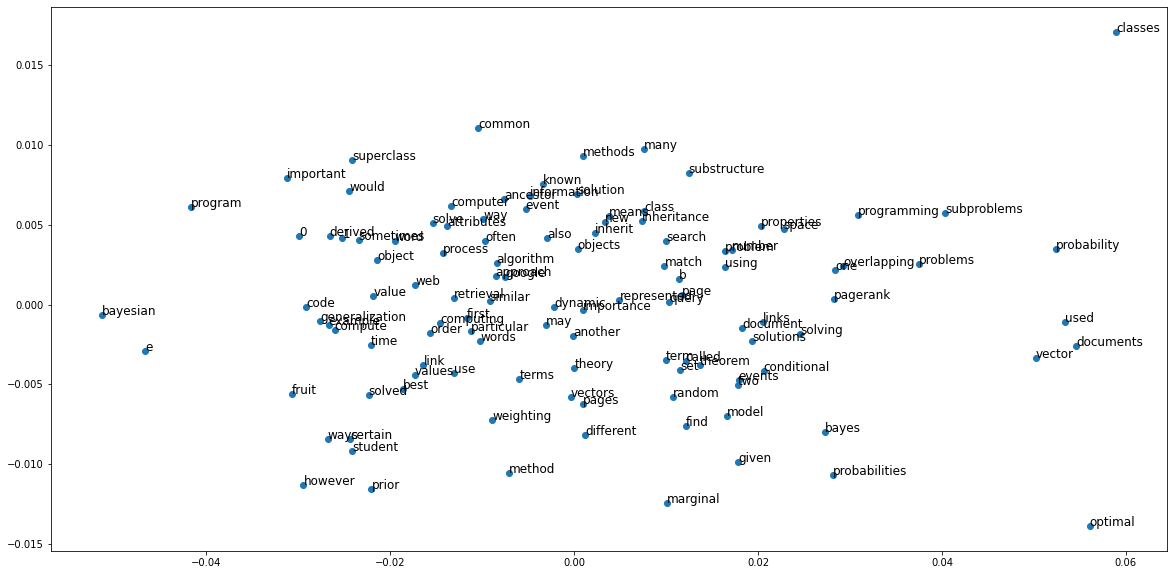

In [65]:

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import matplotlib.cm as cm
import numpy as np

model = Word2Vec(new_lines, min_count=20)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=3)


result = pca.fit_transform(X)
# create a scatter plot of the projection
#colors = cm.rainbow(np.linspace(0, 1, len(result[:, 1])))

pyplot.figure(figsize= (20,10))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), size = 12)
pyplot.show()